In [1]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#data_file=open(r"C:\Users\Vishnu\Documents\Docs\Data Science\mnist_dataset\mnist_train_100.csv",'r')
#data_list=data_file.readlines()
#data_file.close()

In [9]:
len(train_data_list)

100

In [10]:
train_data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

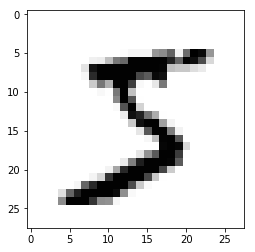

In [11]:
all_values=train_data_list[0].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys',interpolation='None')

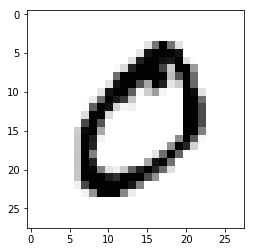

In [12]:
all_values=train_data_list[1].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys',interpolation='None')

In [13]:
#Scaling inputs between 0.01 to 1.00
scaled_input=(np.asfarray(all_values[1:])/255*0.99)+0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [13]:
onodes=10
targets=numpy.zeros(onodes)+0.01
targets[int(all_values[0])]=0.99

In [2]:
class NeuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate=0.5):
        #sets number of nodes in input,hidden and output layer
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        #learning rate
        self.lr=learningrate
        
        #link weight matrices
        
        #self.wih=(numpy.random.rand(self.hnodes,self.inodes)-0.5) 
        #self.who=(numpy.random.rand(self.onodes,self.hnodes)-0.5)
        
        #to optimize using normal distribution
        #0.0 is the centre, the power is the standard deviation, and the last argument is the size we want
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        #Activation function
        self.activation_function=lambda x:scipy.special.expit(x)
        
        pass
    
    def train(self,inputs_list,targets_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        #Hidden layer
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #Final layer
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        
        #Errors
        
        #Final layer error
        output_errors=targets-final_outputs
        #Hidden layer error backpropogated
        hidden_errors=numpy.dot(self.who.T,output_errors)
        
        #Update weights
        #Hidden layer to output layer
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        #Input layer to hidden layer
        self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
                                    
        pass
    
    
    def query(self,inputs_list):
        
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        #Hidden Layer
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #Final Layer
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs
    

In [3]:
inputnodes=784
hiddennodes=200
outputnodes=10
learningrate=0.1

n=NeuralNetwork(inputnodes,hiddennodes,outputnodes,learningrate)

In [4]:
train_data_file=open(r"C:\Users\Vishnu\Documents\Docs\Data Science\mnist_dataset\mnist_train.csv",'r')
train_data_list=train_data_file.readlines()
train_data_file.close()

In [5]:
epochs=7

for e in range(epochs):
    for record in train_data_list:
        all_values=record.split(',')
        inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=numpy.zeros(outputnodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        pass

In [35]:
test_data_file=open(r"C:\Users\Vishnu\Documents\Docs\Data Science\mnist_dataset\kaggle_test.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

<class 'list'>


In [36]:
all_values=test_data_list[0].split(',')
print(all_values[0])
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap="Greys",interpolation="None")
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

pixel0


ValueError: could not convert string to float: 'pixel1'

In [37]:
#testing the network
scorecard=[]
predictions=[]

for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    print(correct_label,"is the correct label")
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=n.query(inputs)
    
    #Index of the maximum in the array
    label=numpy.argmax(outputs)
    print(label,"is the Network's answer",)
    if(label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass

    predictions.append(label)
pass


ValueError: invalid literal for int() with base 10: 'pixel0'

In [10]:
#Calculating score
scorecard_array=numpy.asarray(scorecard)
print("Performance=",scorecard_array.sum()/scorecard_array.size)

Performance= 0.9724


In [31]:
import pandas as pd
submissions=pd.DataFrame({"ImageId": list(range(1,len(scorecard_array)+1)),"Label":predictions})
submissions.head()
submissions.to_csv("submission.csv",header=True,index=False)

6


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 